# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

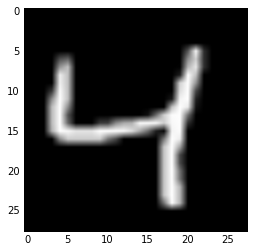

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. **The targets are the same as the inputs.** And there should be **one hidden layer with a ReLU activation** and **an output layer with a sigmoid activation**. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
nb_images = mnist.train.images.shape[0]
image_size = mnist.train.images.shape[1]
print(nb_images)
print(image_size)
inputs = tf.placeholder(tf.float32, (None, image_size))

60000
784


In [11]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

nb_images = mnist.train.images.shape[0]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [12]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6906
Epoch: 1/20... Training loss: 0.6871
Epoch: 1/20... Training loss: 0.6831
Epoch: 1/20... Training loss: 0.6786
Epoch: 1/20... Training loss: 0.6731
Epoch: 1/20... Training loss: 0.6668
Epoch: 1/20... Training loss: 0.6599
Epoch: 1/20... Training loss: 0.6507
Epoch: 1/20... Training loss: 0.6395
Epoch: 1/20... Training loss: 0.6287
Epoch: 1/20... Training loss: 0.6152
Epoch: 1/20... Training loss: 0.5997
Epoch: 1/20... Training loss: 0.5851
Epoch: 1/20... Training loss: 0.5691
Epoch: 1/20... Training loss: 0.5527
Epoch: 1/20... Training loss: 0.5370
Epoch: 1/20... Training loss: 0.5169
Epoch: 1/20... Training loss: 0.5010
Epoch: 1/20... Training loss: 0.4805
Epoch: 1/20... Training loss: 0.4612
Epoch: 1/20... Training loss: 0.4428
Epoch: 1/20... Training loss: 0.4243
Epoch: 1/20... Training loss: 0.4085
Epoch: 1/20... Training loss: 0.3908
Epoch: 1/20... Training loss: 0.3819
Epoch: 1/20... Training loss: 0.3736
E

Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1814
E

Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1532
E

Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1320
E

Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1201
E

Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1190
E

Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1100
E

Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1038
E

Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1006
E

Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.0984
E

Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1001
E

Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0914
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0960
E

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.1006
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.1009
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0892
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0990
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0891
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0881
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0989
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0981
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0897
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0938


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

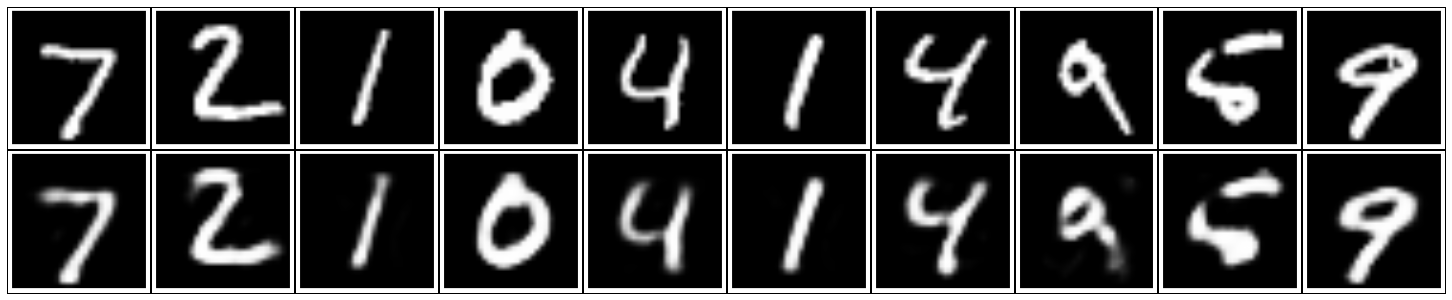

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.